In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing as pp

## Read in Data
life = pd.read_csv("all_data.csv")
print(life.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [3]:
#explore through data set
life.info()
life.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


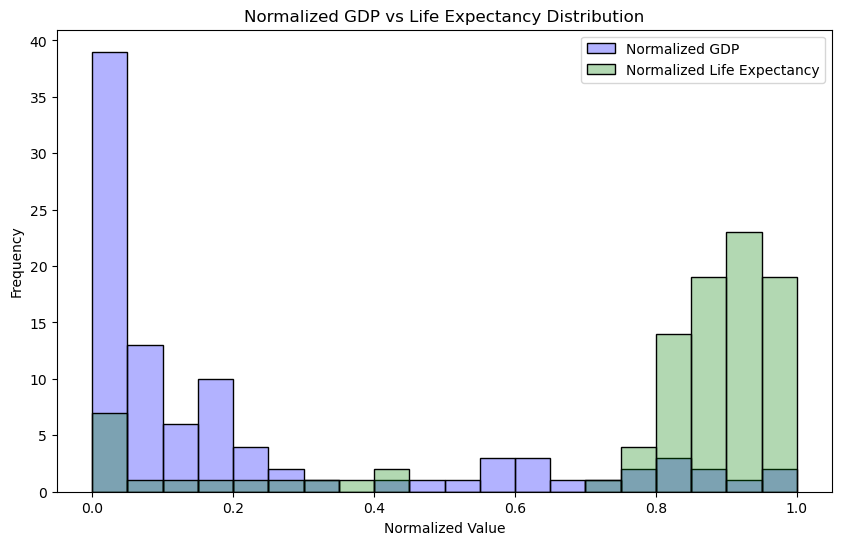

In [4]:
#normalize GDP and life expectancy
normalized_gdp = (life['GDP'] - life['GDP'].min()) / (life['GDP'].max() - life['GDP'].min())
normalized_life_expectancy = (life['Life expectancy at birth (years)'] - life['Life expectancy at birth (years)'].min()) / (life['Life expectancy at birth (years)'].max() - life['Life expectancy at birth (years)'].min())

# Plotting Normalized GDP vs Life Expectancy Distribution
plt.figure(figsize=(10, 6))
sns.histplot(normalized_gdp, bins=20, color='blue', alpha = 0.3, label='Normalized GDP')
sns.histplot(normalized_life_expectancy, bins=20, color='green', alpha = 0.3, label='Normalized Life Expectancy')

plt.title('Normalized GDP vs Life Expectancy Distribution')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

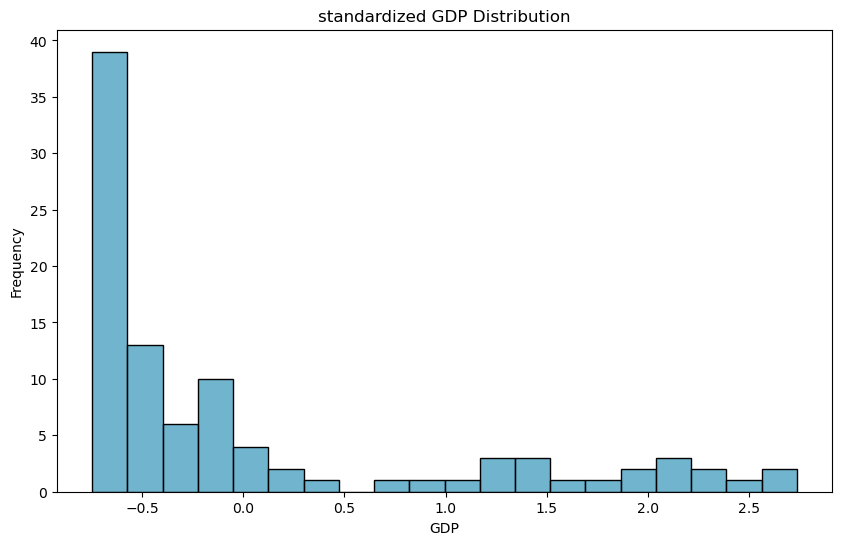

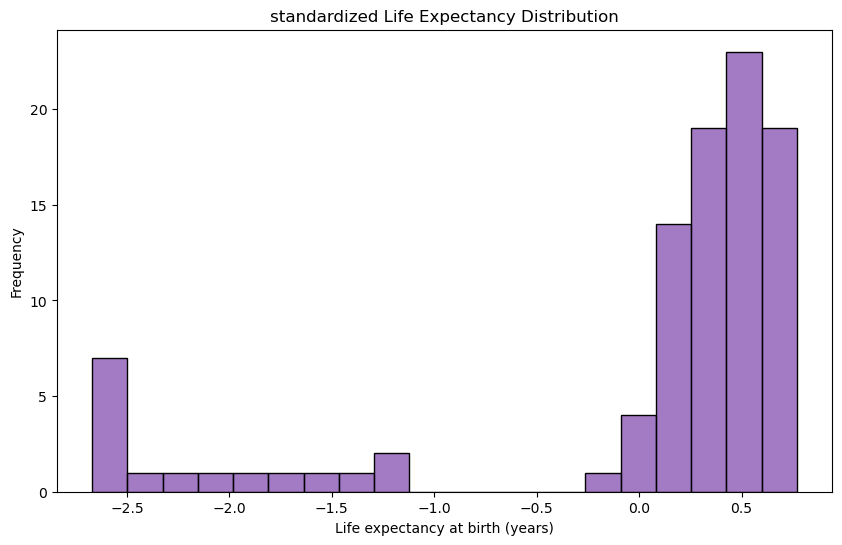

In [5]:
# Standardization : x - x_mean / x_std
standardized_gdp = (life['GDP'] - life['GDP'].mean()) / (life['GDP'].std())
standardized_life_expectancy = (life['Life expectancy at birth (years)'] - life['Life expectancy at birth (years)'].mean()) / (life['Life expectancy at birth (years)'].std())

# Plotting standardized GDP
plt.figure(figsize=(10, 6))
sns.histplot(standardized_gdp,bins=20, color='#419bbe')
plt.title('standardized GDP Distribution')
plt.ylabel('Frequency')
plt.show()
plt.close()


# Plotting standardized Life Expectancy
plt.figure(figsize=(10, 6))
sns.histplot(standardized_life_expectancy,bins=20 , color='#844eb1')
plt.title('standardized Life Expectancy Distribution')
plt.ylabel('Frequency')
plt.show()
plt.close()

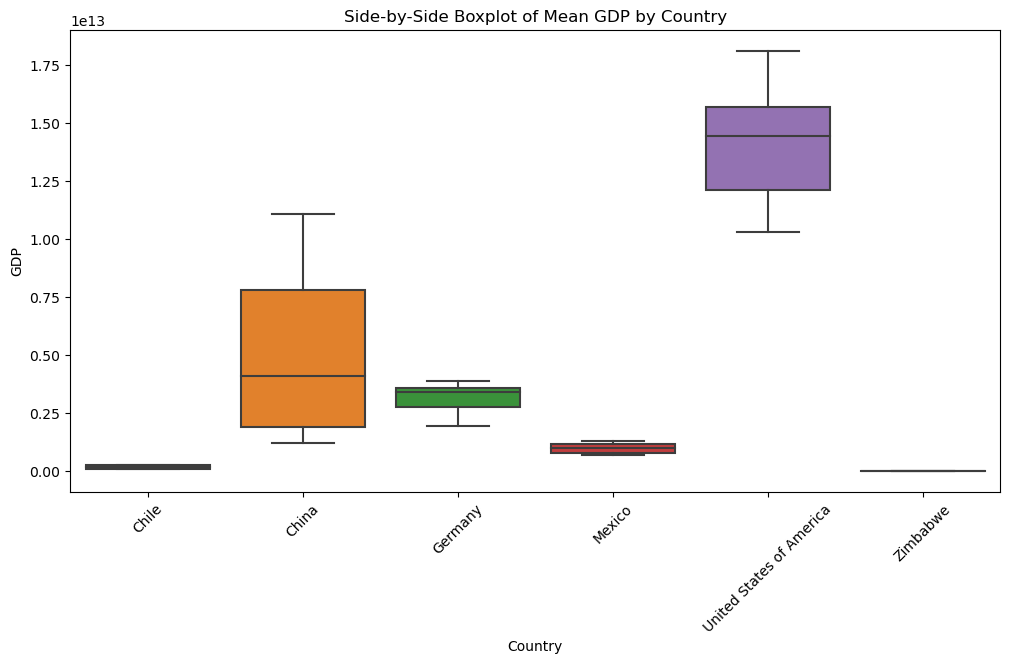

In [6]:
# Plotting a Side-by-Side Boxplot of Mean GDP by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='GDP', data=life)
plt.title('Side-by-Side Boxplot of Mean GDP by Country')
plt.xticks(rotation=45)
plt.show()
plt.close()

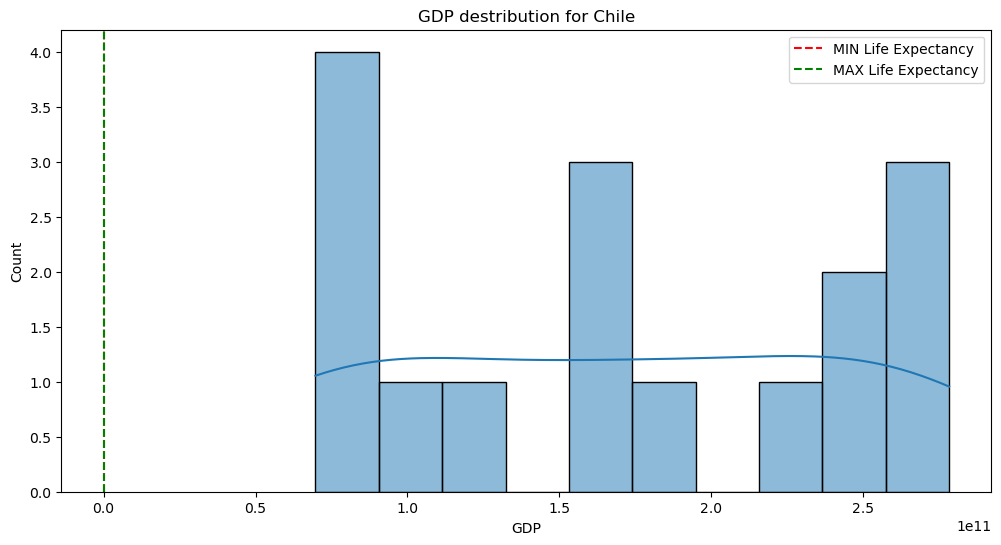

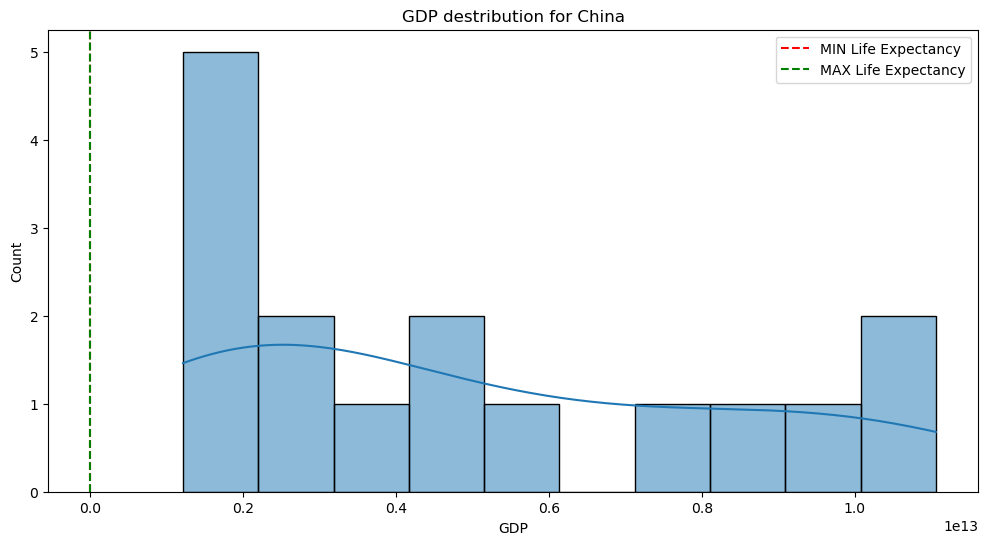

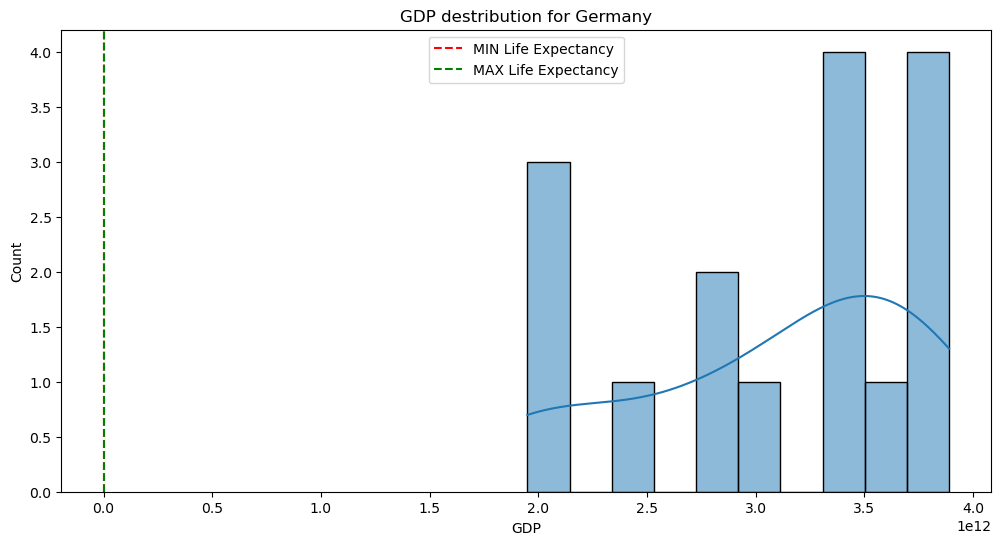

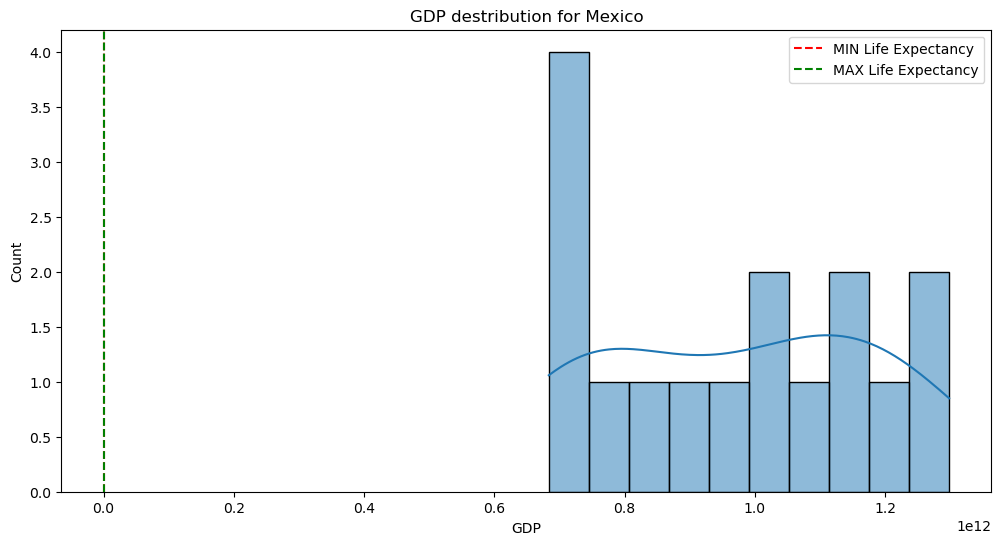

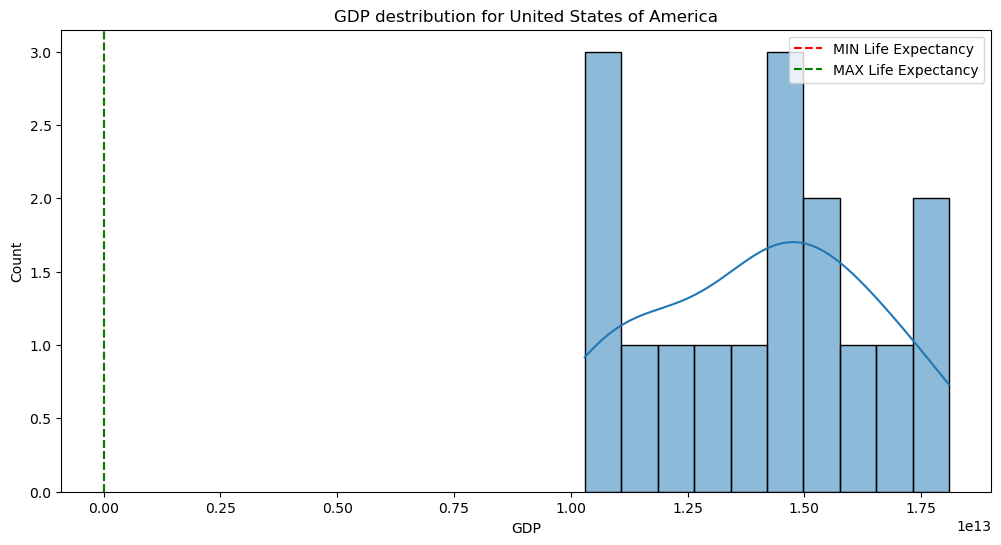

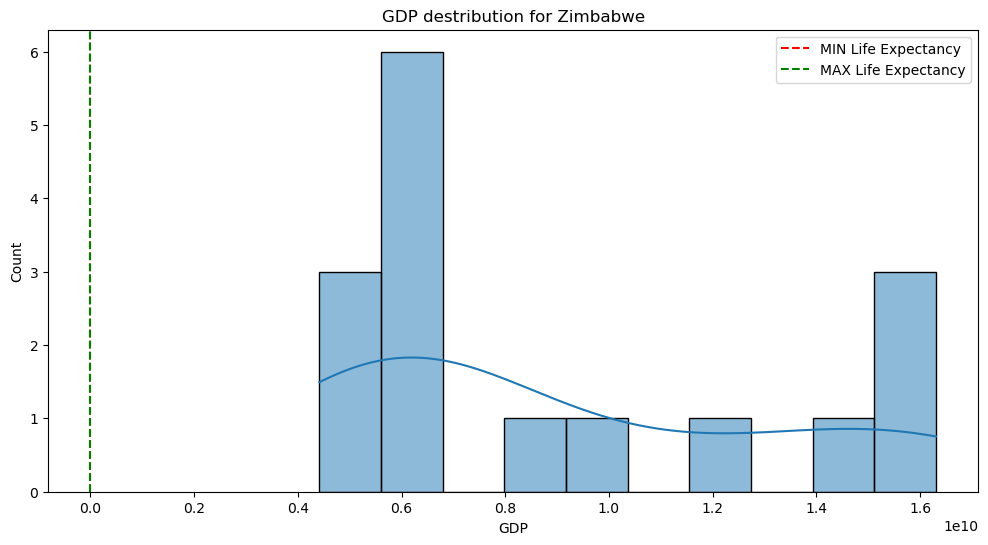

In [16]:
for c in life['Country'].unique():
    
#Create a list individually
    country = life[life['Country'] == c]

    # Create a histogram of GDP for China
    plt.figure(figsize=(12, 6))
    sns.histplot(data=country, x='GDP', bins=10, kde=True)
    plt.axvline(country['Life expectancy at birth (years)'].min(), color='red', linestyle='--', label='MIN Life Expectancy')
    plt.axvline(country['Life expectancy at birth (years)'].max(), color='green', linestyle='--', label='MAX Life Expectancy')
    plt.xlabel('GDP')
    plt.title('GDP destribution for ' + str(c))
    plt.legend()
    plt.show()

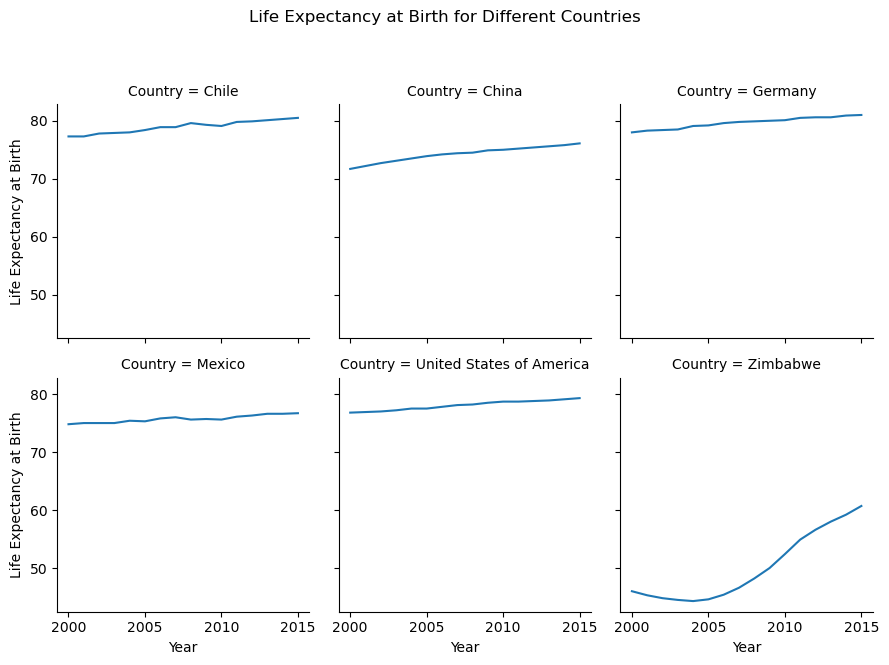

In [8]:
#Life Expectancy at Birth for Different Countries
leab_year = sns.FacetGrid(life, col="Country", col_wrap=3)
leab_year.map(sns.lineplot, "Year", "Life expectancy at birth (years)")

leab_year.set_axis_labels("Year", "Life Expectancy at Birth")
leab_year.fig.suptitle("Life Expectancy at Birth for Different Countries", y=1.1)

plt.show()
plt.close()

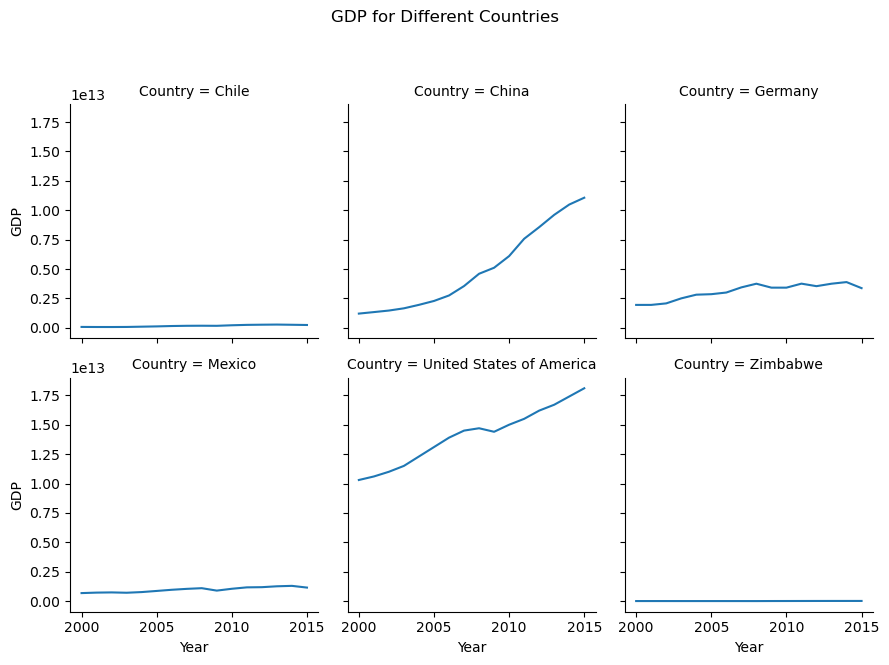

In [9]:
#GDP for Different Countries

GDP_year = sns.FacetGrid(life, col="Country", col_wrap=3)
GDP_year.map(sns.lineplot, "Year", "GDP")

GDP_year.set_axis_labels("Year", "GDP")
GDP_year.fig.suptitle("GDP for Different Countries", y=1.1)

plt.show()
plt.close()